In [5]:
import pandas as pd
import io # библиотека ввода вывода данных чтоб удобно было просто скопировав ввести данные

import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import io

In [2]:
data = """id,X,Y
1,12,20
2,14,41
3,24,62
4,13,23
5,15,28
6,5,14
7,16,33
8,20,36
9,3,9
10,8,20"""

In [3]:
data = pd.read_csv(io.StringIO(data), index_col = 'id')
data

,X,Y
id,,
1,12,20
2,14,41
3,24,62
4,13,23
5,15,28
6,5,14
7,16,33
8,20,36
9,3,9


<Axes: xlabel='X', ylabel='Y'>

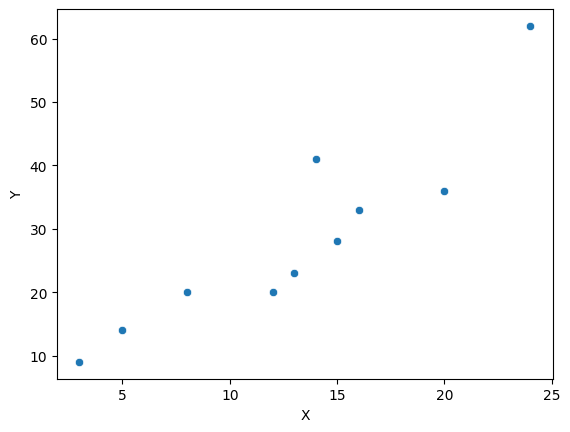

In [6]:
sns.scatterplot(x=data.X, y=data.Y)

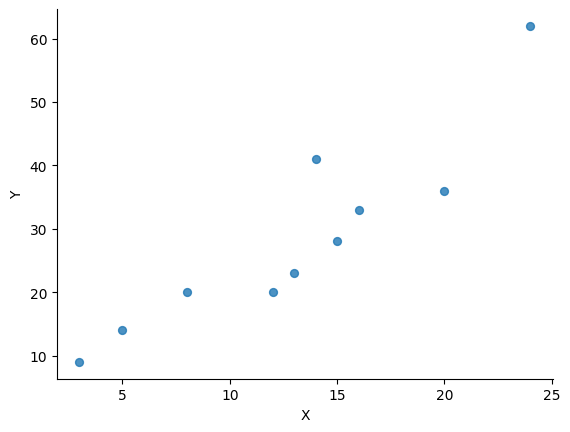

In [23]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Определим выборочные средние столбцов X и Y

In [4]:
print(data.X.mean())  # или так print(data.['X'].mean()
print(data.Y.mean())

13.0
28.6


In [5]:
#подключаем модель линейной регрессии из библиотеки sklearn
from sklearn.linear_model import LinearRegression

In [6]:
X_train = pd.DataFrame(data.X)  # выделяем целевые признаки по столбцу х

In [7]:
y_train = pd.DataFrame(data.Y) # выделяем целевые признаки по столбцу y

In [8]:
#обучаем модель линейной регрессии
reg_model = LinearRegression().fit(X_train, y_train)

Найдем коэффициенты  Θ0  и  Θ1

In [9]:
# Тета 0
reg_model.intercept_

array([0.5144385])

In [10]:
# Тета 1
reg_model.coef_

array([[2.16042781]])


Для нахождения  R2  в данном случае нужно определить предсказания модели для тренировочных данных

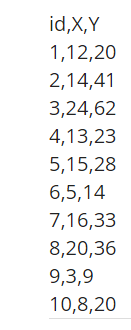

In [11]:
y_predicted = reg_model.predict(X_train)      # ТО ЕСТЬ ТУТ МЫ СМОТРИМ НАСКОЛЬКО МОЕЛЬ ПРЕДСКАЗАЛА НАШИ ДАННЫЕ В КОЛОНКЕ y
y_predicted

array([[26.43957219],
       [30.76042781],
       [52.36470588],
       [28.6       ],
       [32.92085561],
       [11.31657754],
       [35.08128342],
       [43.72299465],
       [ 6.99572193],
       [17.79786096]])

In [12]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predicted)

0.8232530034187879

МОЖНО СДЕЛАТЬ КАК ДЕЛАЕТСЯ С БОЛЬШИМИ ДАННЫМИ ПОПРБОВАТЬ РАЗДЕЛЕНИЕ НА 80/20 , НО В ИТОГЕ КОНЕЧНО МЫ ПОЛУЧИМ НЕ СОВСЕМ ПОДХОДЯЩИЙ РЕЗУЛЬТАТ, ХОТЯ И ВЕРНЫЙ, МОДЕЛЬ НА ТЕСТОВЫХ ДАСТ БОЛЬШУЮ ОШИБКУ И ЭТО И ПОНЯТНО, МЫ ЖЕ ПОЧТИ ВСЕ ЦИФРЫ УБРАЛИ И ХОТИМ ЧТО ТО ПОЛУЧИТЬ. НО ЭТО ПОЗВОЛЯЕТ ПОКАЗАТЬ КАК РАБОТАЕТ МОДЕЛЬ И ЛУЧШЕ ПОНЯТЬ ЕЕ ДЕЙСТВИЯ.

In [14]:
X = pd.DataFrame(data.X)  # выделяем целевые признаки по столбцу х

In [15]:
y = pd.DataFrame(data.Y) # выделяем целевые признаки по столбцу y

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Предположим, у вас есть данные X и y
# X - это матрица признаков (например, столбец x)
# y - это вектор целевой переменной (например, столбец y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии на обучающей выборке
reg_model = LinearRegression().fit(X_train, y_train)

# Предсказание на обучающей выборке (для проверки)
y_train_predicted = reg_model.predict(X_train)

# Предсказание на тестовой выборке
y_test_predicted = reg_model.predict(X_test)

# Теперь у вас есть предсказания на тестовой выборке, которые можно сравнить с реальными значениями y_test

In [21]:
y_train_predicted

array([[ 8.96766524],
       [24.71849738],
       [42.71944841],
       [51.71992392],
       [15.71802187],
       [31.46885402],
       [26.96861626],
       [33.7189729 ]])

In [18]:
y_test_predicted

array([[ 4.46742748],
       [29.21873514]])

In [22]:
# Вычисление R² на обучающей выборке
r2_train = r2_score(y_train, y_train_predicted)
print(f"R² на обучающей выборке: {r2_train}")

# Вычисление R² на тестовой выборке
r2_test = r2_score(y_test, y_test_predicted)
print(f"R² на тестовой выборке: {r2_test}")

R² на обучающей выборке: 0.8445084493749562
R² на тестовой выборке: 0.6887843451116751


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Text(0, 0.5, 'y')

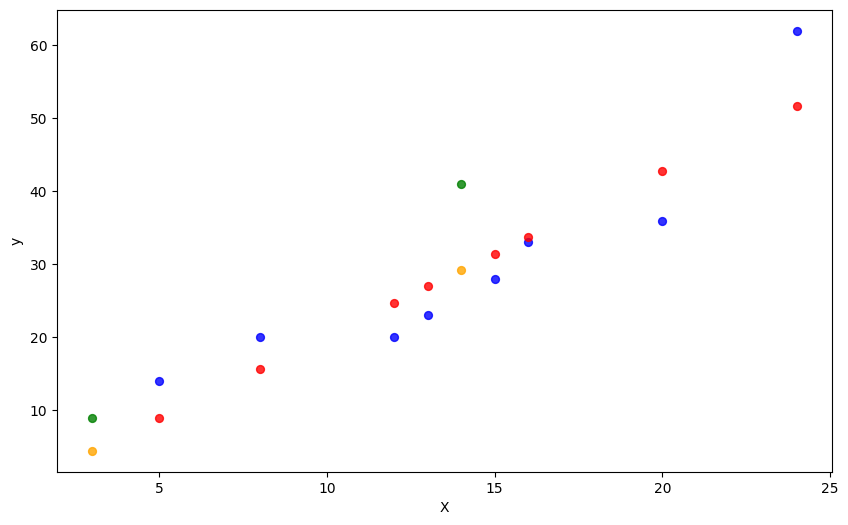

In [25]:
# Построение графика
plt.figure(figsize=(10, 6))

# График для обучающей выборки
plt.scatter(X_train, y_train, color='blue', label='Обучающая выборка (истинные значения)', s=32, alpha=0.8)
plt.scatter(X_train, y_train_predicted, color='red', label='Обучающая выборка (предсказанные значения)', s=32, alpha=0.8)

# График для тестовой выборки
plt.scatter(X_test, y_test, color='green', label='Тестовая выборка (истинные значения)', s=32, alpha=0.8)
plt.scatter(X_test, y_test_predicted, color='orange', label='Тестовая выборка (предсказанные значения)', s=32, alpha=0.8)

# Настройка графика
plt.xlabel('X')
plt.ylabel('y')